In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from src.features.geocluster import plot_elbow

# Cargar usuarios enriquecidos con coordenadas
users = pd.read_csv("../data/processed/users_enriched.csv")

# Filtrar filas con lat/lon válidas
geo_df = users.dropna(subset=["Latitude", "Longitude"]).copy()
coords = geo_df[["Latitude", "Longitude"]]


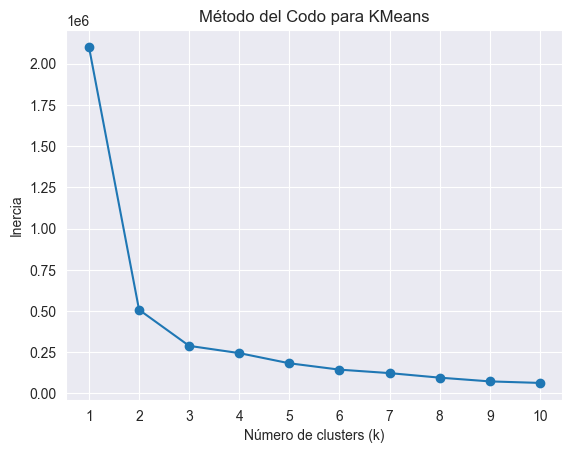

In [12]:
plot_elbow(coords, max_k=10)

In [13]:
kmeans = KMeans(n_clusters=5, random_state=7)
geo_df["GeoCluster"] = kmeans.fit_predict(coords)


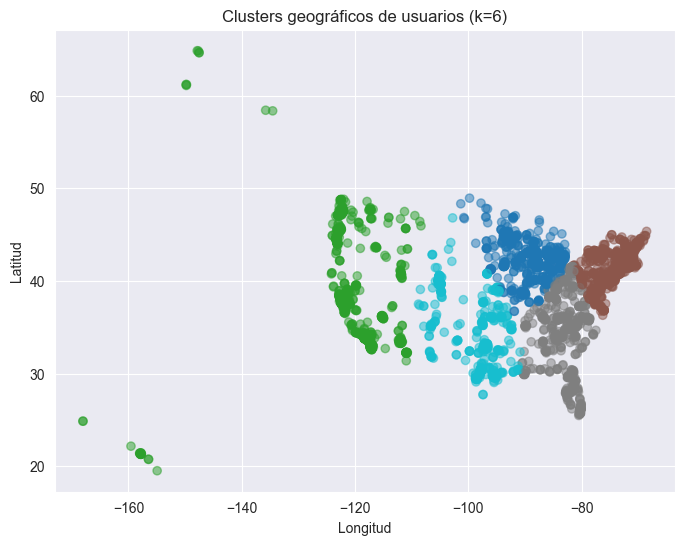

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(geo_df["Longitude"], geo_df["Latitude"], c=geo_df["GeoCluster"], cmap="tab10", alpha=0.5)
plt.title("Clusters geográficos de usuarios (k=6)")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.show()


In [15]:
geo_df_final = users.merge(geo_df[["UserID", "GeoCluster"]], on="UserID", how="left")
geo_df_final.to_csv("../data/processed/users_clustered.csv", index=False)


In [16]:

geo_df_final['GeoCluster'].value_counts().sort_index()


GeoCluster
0.0    1359
1.0    1615
2.0    1576
3.0     761
4.0     588
Name: count, dtype: int64

In [18]:
df2 = geo_df_final[["UserID", "GeoCluster"]]
df2.head()

,UserID,GeoCluster
0,1,0.0
1,2,3.0
2,3,0.0
3,4,2.0
4,5,0.0
